# Assignment – 1
### Predictive Modelling of Eating-Out problem
Student name: Kay Huynh
Student ID: u3245926

### Part A –Importing and Understanding Data

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Read data
data= pd.read_csv('data\zomato_df_final_data.csv')

### 1/ Provide plots/graphs to support:
#### How many unique cuisines are served by Sydney restaurants?

In [48]:
# Cuisine column processing 
data['cuisine'] = data['cuisine'].str.split(', ')
restaurant_df = data.explode("cuisine").reset_index(drop=True)
restaurant_df['cuisine'] = restaurant_df['cuisine'].astype(str)
restaurant_df['cuisine'] = restaurant_df['cuisine'].str.replace('[', '')
restaurant_df['cuisine'] = restaurant_df['cuisine'].str.replace("'", '')
restaurant_df['cuisine'] = restaurant_df['cuisine'].str.replace("]", '')

In [49]:
# type column processing 
restaurant_df['type'] = restaurant_df ['type'].str.split(', ')
restaurant_df = restaurant_df.explode("type").reset_index(drop=True)
restaurant_df['type'] = restaurant_df['type'].astype(str)
restaurant_df['type'] = restaurant_df['type'].str.replace('[', '')
restaurant_df['type'] = restaurant_df['type'].str.replace("'", '')
restaurant_df['type'] = restaurant_df['type'].str.replace("]", '')


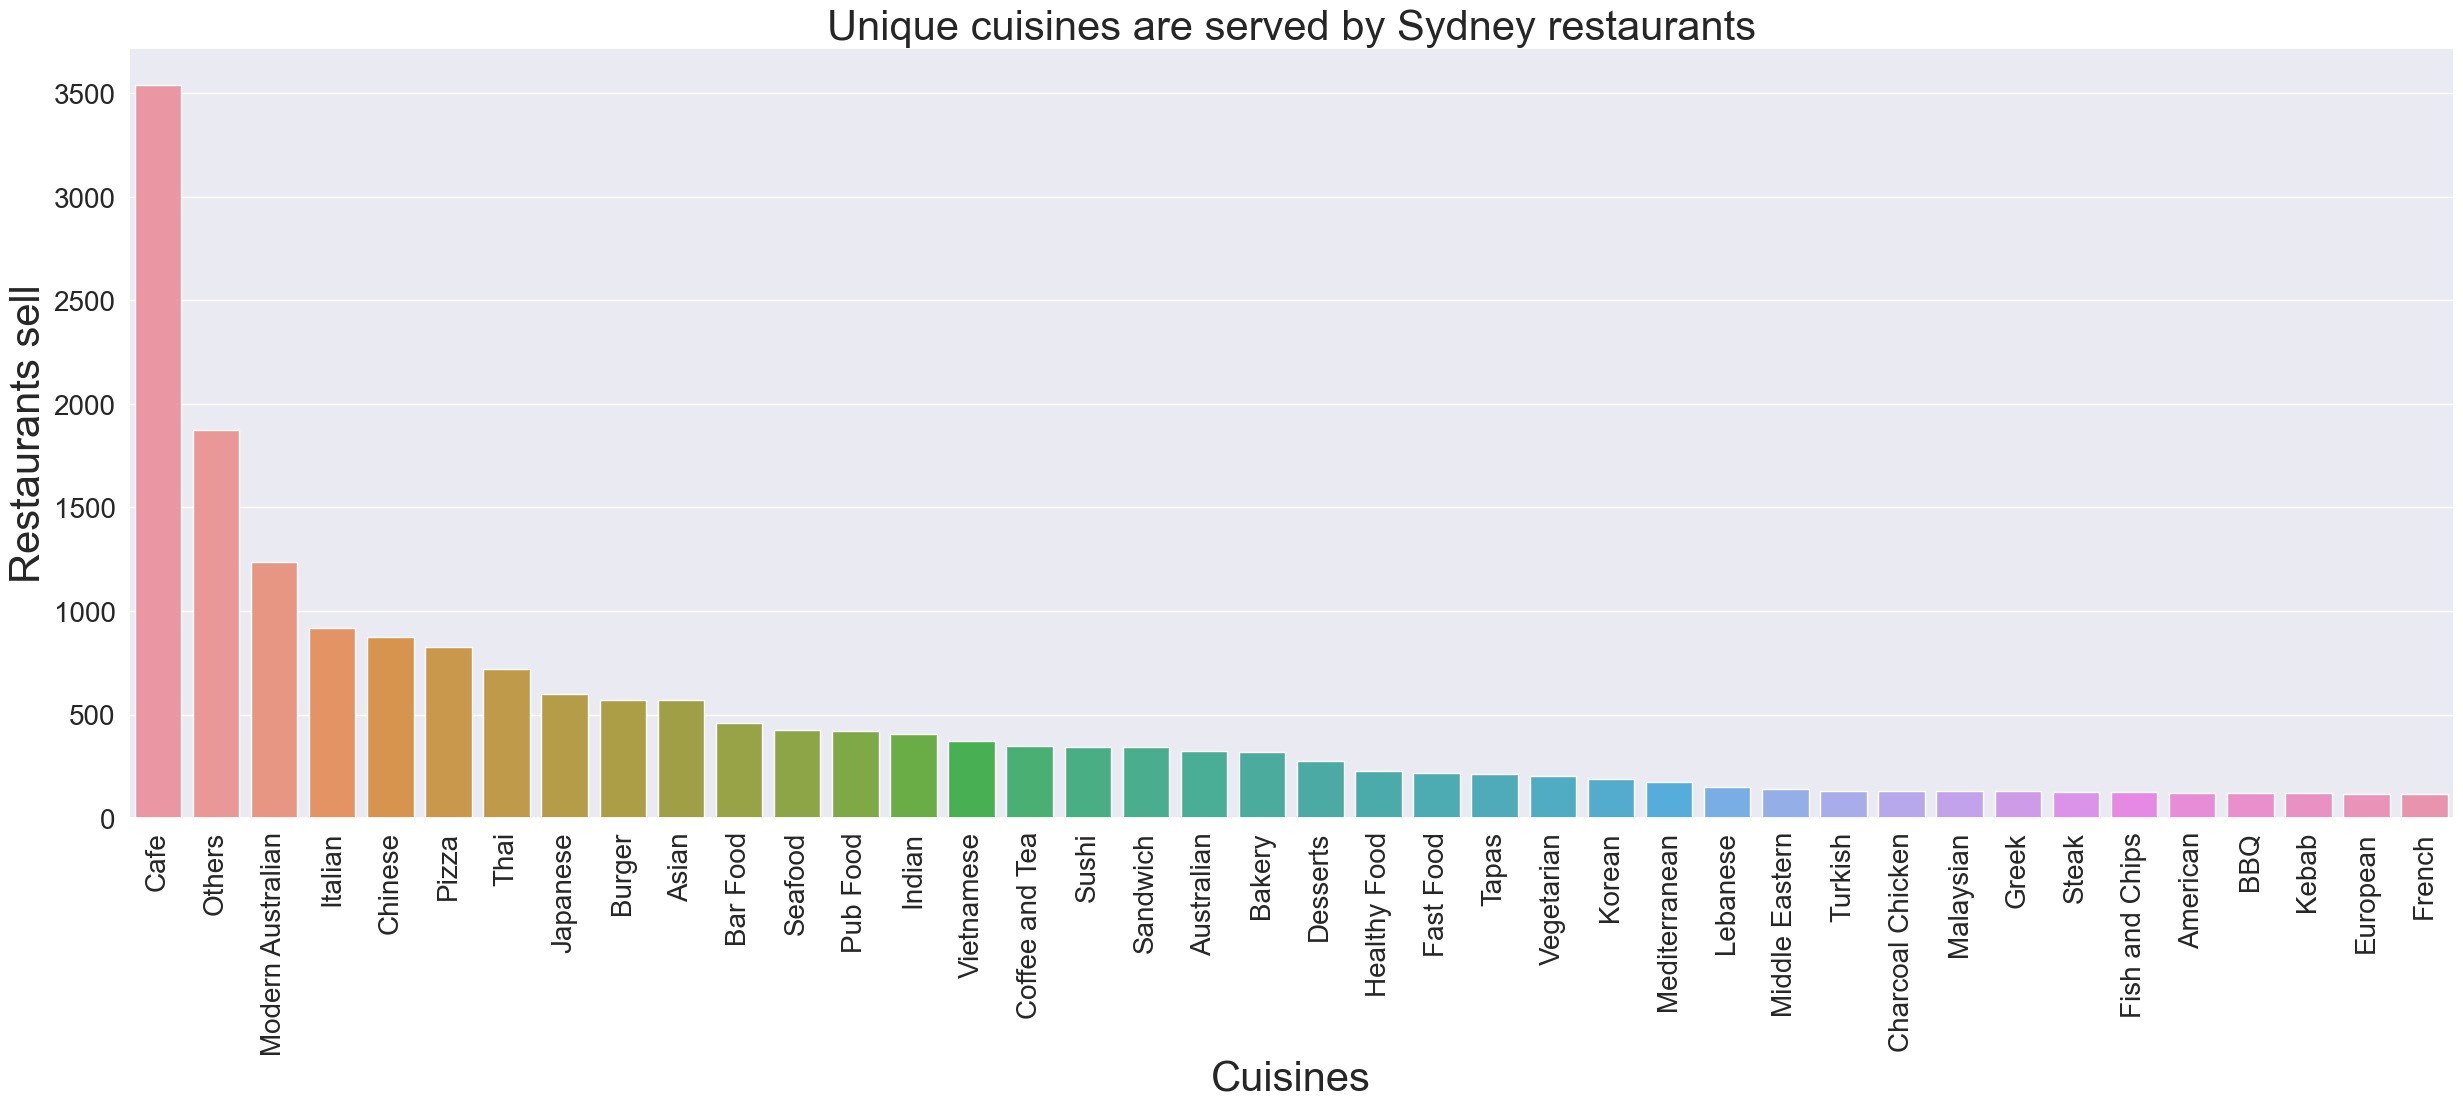

In [50]:
# Visualize the cuisine bar chart
# Create UniqueCuisine data
UniqueCuisine = restaurant_df.groupby(['cuisine']).size().reset_index().rename(columns={0: "Cuisine_Count"})

# Sort UniqueCuisine DataFrame by 'Cuisine_Count' in descending order
UniqueCuisine = UniqueCuisine.sort_values(by='Cuisine_Count', ascending=False)
cuisine_counts = UniqueCuisine.groupby('cuisine')['Cuisine_Count'].sum().reset_index()

# Summarize all cuisine occur less than 100 to others
# Identify cuisines with counts less than 100
under100_cuisines = cuisine_counts[cuisine_counts['Cuisine_Count'] < 100]

# Create "Others" category and aggregate counts
other_category = {
    'cuisine': 'Others',
    'Cuisine_Count': under100_cuisines['Cuisine_Count'].sum()
}
# Remove rows under 100 times occur
cuisine_counts = cuisine_counts[~cuisine_counts['cuisine'].isin(under100_cuisines['cuisine'])]

# Append the "Others" category
cuisine_counts = pd.concat([cuisine_counts, pd.DataFrame([other_category])], ignore_index=True)

# Sort the DataFrame by cuisine count
cuisine_counts = cuisine_counts.sort_values(by='Cuisine_Count', ascending=False)

# Create the bar plot with seaborn
plt.figure(figsize=(30, 10))
sns.barplot(x='cuisine', y='Cuisine_Count', data=cuisine_counts)
plt.title('Unique cuisines are served by Sydney restaurants', size=30)
plt.xlabel('Cuisines', size=30)
plt.ylabel('Restaurants sell', size=30)
plt.yticks(size = 20)
plt.xticks(rotation=90, size = 20) 
plt.show()

#### Which suburbs (top-3) have the highest number of restaurants?

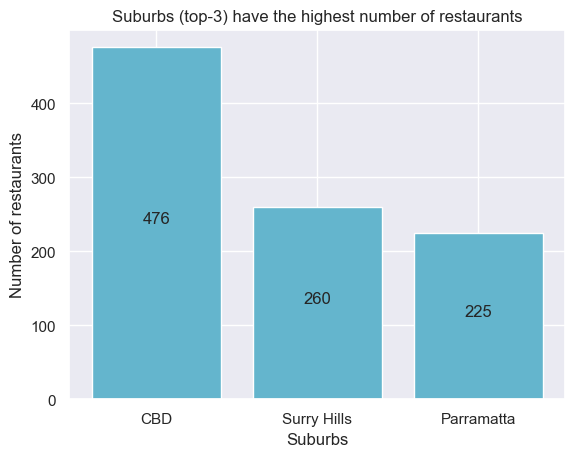

In [51]:
subzone = data['subzone'].value_counts().head(3).to_frame()
subzone['subzone names'] = subzone.index

X = subzone["subzone names"].tolist()
Y = subzone['count'].tolist()

# Create a bar chart
plt.bar(X, Y, color ="c")

# Function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
    
# Calling the function to add value labels
addlabels(X, Y)
# Add labels and a title
plt.xlabel('Suburbs')
plt.ylabel('Number of restaurants')
plt.title('Suburbs (top-3) have the highest number of restaurants')

# Show the chart
plt.show()


#### “Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive”. Do you agree on this statement or not? Please support your answer by numbers and visuals. (hint: use stacked bar chart or histogram to relate ‘cost’ to 'rating_text')

C:\Users\TDC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


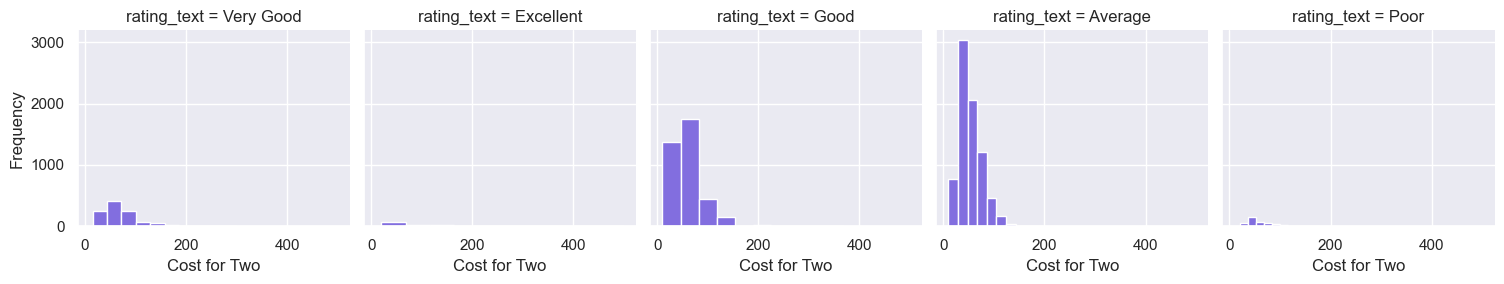

In [52]:
facet = sns.FacetGrid(restaurant_df, col = 'rating_text')
facet.map(plt.hist, 'cost', color = '#826EDF')
# Introduce some spacing of each of the plot
facet.fig.subplots_adjust(wspace = 0.05, hspace = 0.5)
facet.set_axis_labels('Cost for Two', 'Frequency')
plt.show()
plt.show()

C:\Users\TDC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


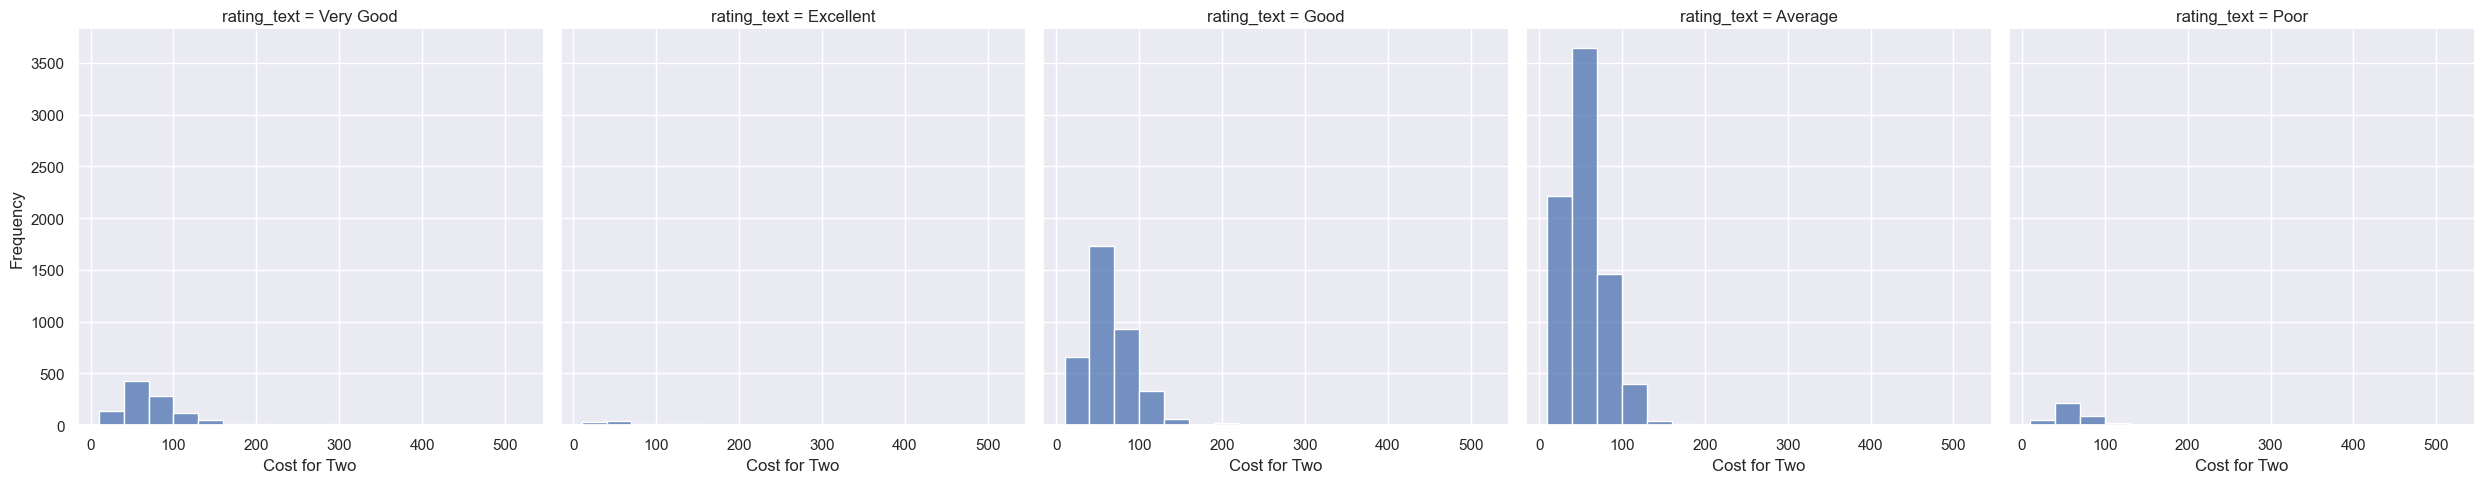

In [53]:
sns.set_theme(style="darkgrid")

# Create a FacetGrid of histograms
g = sns.displot(
    data=restaurant_df, x='cost', col='rating_text',
    binwidth=30, height=5, facet_kws=dict(margin_titles=True)
)

# Set axis labels for the FacetGrid
g.set_axis_labels('Cost for Two', 'Frequency')

# Show the plot
plt.show()

###### Based on the histogram by rating, I disagree with the statement, because the cost for two distribution of Excellent and poor rating are nearly the same, under 200 dollars. 
###### While the most expensive restaurant is rate very good, the cost for two could be 300 dollars.

### 2/ Perform exploratory analysis for the variables of the data. This can be done by producing histograms and distribution plots and descriptive insights about these variables. This can be performed at least for the following variables.
o Cost
o Rating
o Type

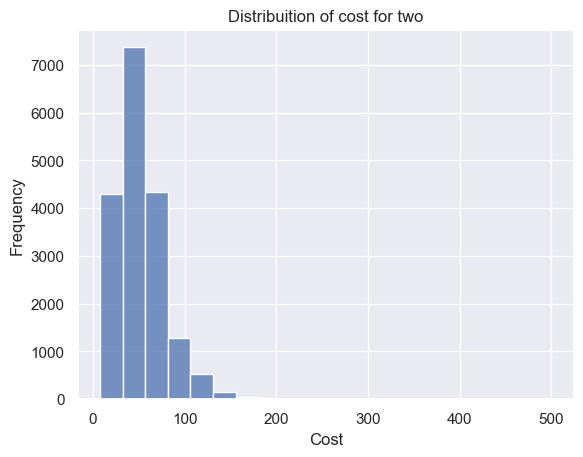

In [54]:
# Distribuition of cost for two
costForTwo = restaurant_df['cost'].tolist()

sns.histplot(costForTwo, bins=20)

# Add labels and a title
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Distribuition of cost for two')

# Show the plot
plt.show()

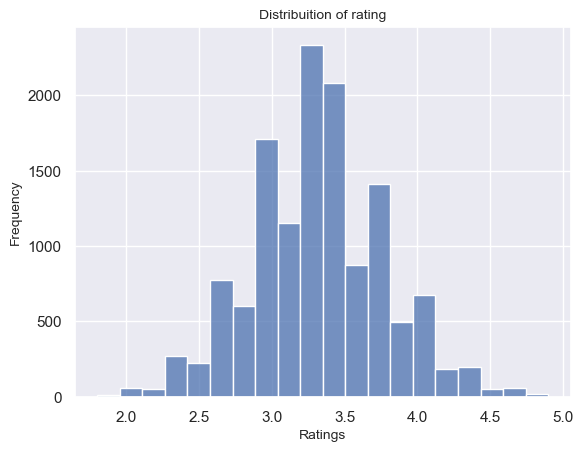

In [55]:
# Create a histogram for distribuition of rating
rating = restaurant_df['rating_number'].tolist()

sns.histplot(rating, bins=20)

# Add labels and a title
plt.xlabel('Ratings',size=10)
plt.ylabel('Frequency',size=10)
plt.title('Distribuition of rating',size=10)

# Show the plot
plt.show()

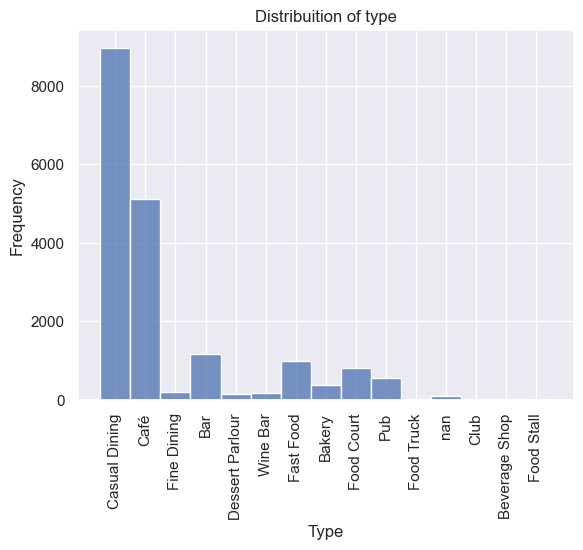

In [56]:
# Distribuition of type
typeOfRest = restaurant_df['type'].tolist()

sns.histplot(typeOfRest, bins=20)

# Add labels and a title
plt.xlabel('Type')
plt.xticks(rotation =90)
plt.ylabel('Frequency')
plt.title('Distribuition of type')

# Show the plot
plt.show()

### 3- Produce Cuisine Density Map: Using the restaurant geographic information and the provided “sydney.geojson” file, write a python function to show a cuisine density map where each suburb is colour-coded by the number of restaurants that serve a particular cuisine. This function can be called as:
“show_cuisine_densitymap(cuisine='Indian')”.
(Hint: use the spatial join in geopandas)